## P-set 1.

1) 50 points 

What are the eigenvalues and eigenvectors of the Pauli-Y matrix? (Analytical)


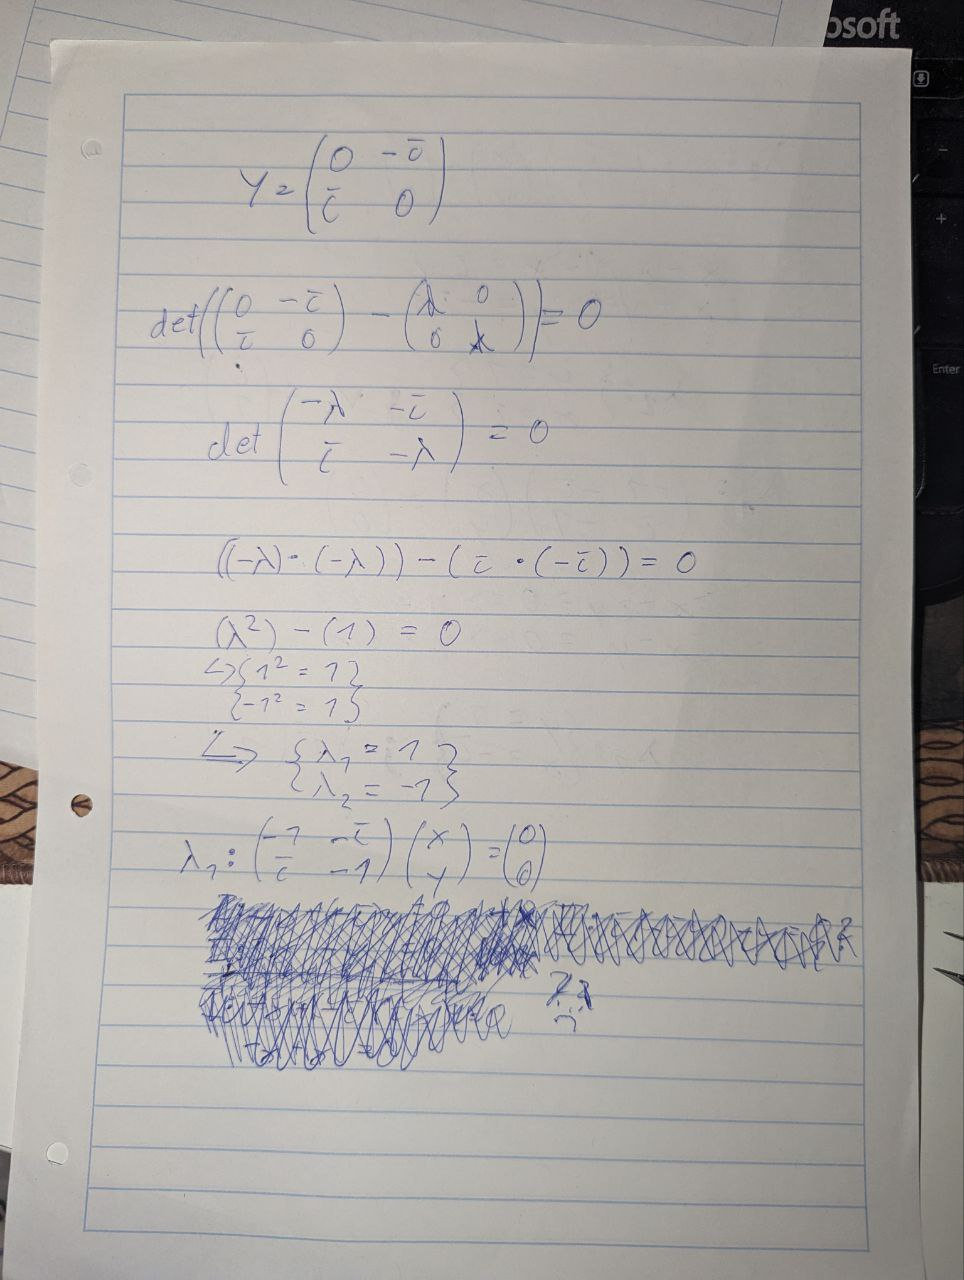

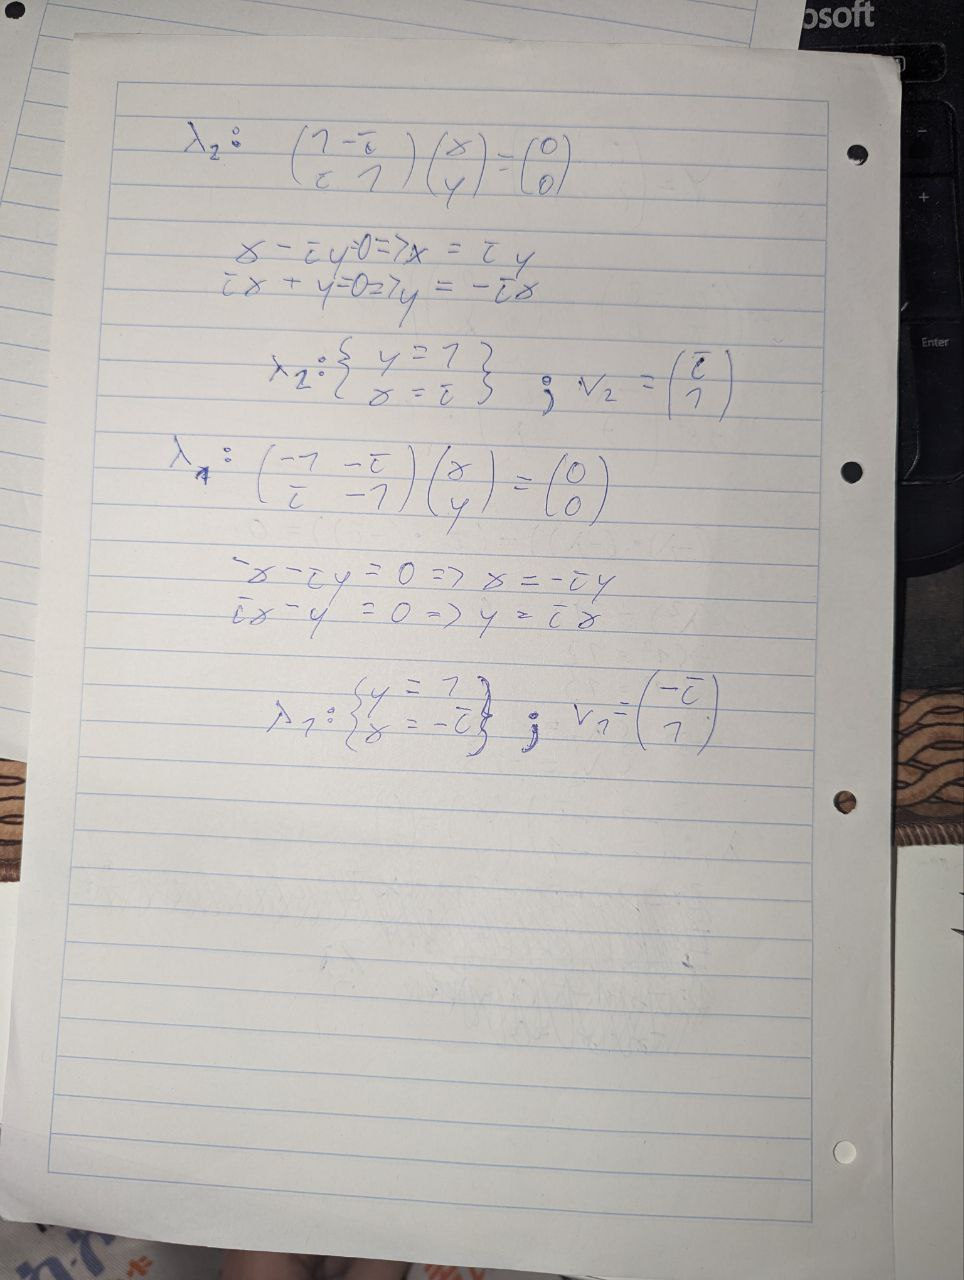

2) 20 points

Plot the eigenvectors on the Bloch Sphere. (Use Qiskit)

In [43]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Pauli
import numpy as np

# Pauli matrix
y = Pauli('Y').to_matrix()

# Eigenvectors of the Pauli-Y matrix
eigvals, eigvecs = np.linalg.eig(y)

obsb = []
i = 0
for eigenvector in eigvecs:
    a = eigenvector[0]
    b = eigenvector[1]
    
    a_con = np.conjugate(a)
    a_bars = np.sqrt(a*a_con)
    
    b_con = np.conjugate(b)
    b_bars = np.sqrt(b*b_con)
    
    feta = 2 * np.arccos(a_bars)
    vieh = np.angle( (b * a_con) / (a_bars * b_bars) )
    print(feta, vieh)
    
    obsb.append([1,feta.real, vieh.real])

(1.5707963267948972+0j) 1.5707963267948966
(1.5707963267948966+0j) -1.5707963267948966


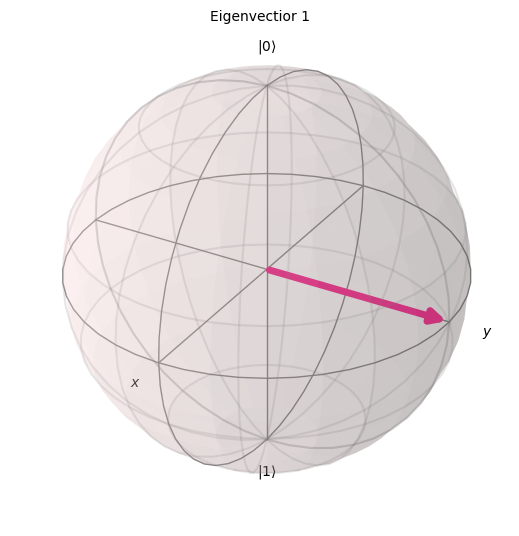

In [34]:
plot_bloch_vector(obsb[0], coord_type='spherical' , title="Eigenvectior 1")

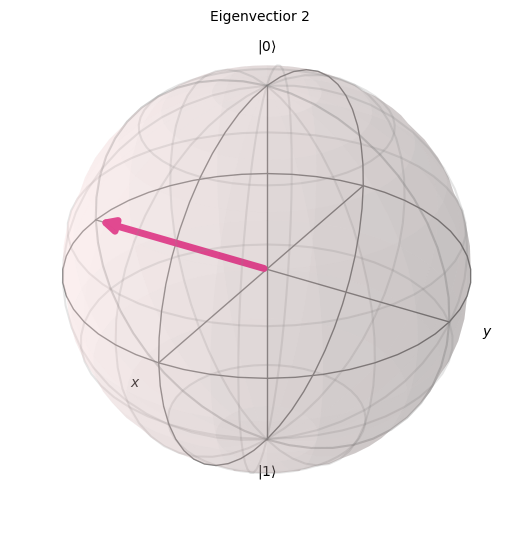

In [30]:
plot_bloch_vector(obsb[1], coord_type='spherical' , title="Eigenvectior 2")

3) 30 points 

Propose a suitable Ansatz (parameterized quantum circuit) to find the minimum eigenvalue of the Pauli-Y matrix with the VQE routine.

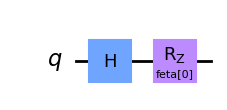

In [42]:
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Operator

theta_list = ParameterVector('feta', length=2)

qc = QuantumCircuit(1)
#start from +
qc.h(0) 
qc.rz(theta_list[0], 0)
qc.draw()
